# Data Analysis and Visualization in Python
## Making Plots With plotnine
Questions
* How can I visualize data in Python?
* What is ‘grammar of graphics’?

Objectives
* Create a `plotnine` object.
* Set universal plot settings.
* Change the aesthetics of a plot such as color.
* Edit the axis labels.
* Build complex plots using a step-by-step approach.
* Create scatter plots, box plots, and time series plots.
* Use the `facet_wrap` and `facet_grid` commands to create a collection of plots splitting the data by a "factor" variable.

In [1]:
import pandas as pd

# Load and clean the data
surveys_complete = pd.read_csv('data/surveys.csv')
surveys_complete = surveys_complete.dropna()

## Why `plotnine`? Why not `matplotlib`?
Python has powerful built-in plotting capabilities such as `matplotlib`, but for this episode, we will be using the `plotnine` package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of `ggplot2` and [The Grammar of Graphics](https://link.springer.com/book/10.1007%2F0-387-28695-0) by Leland Wilkinson. The `plotnine` package is built on top of Matplotlib and interacts well with Pandas.

In [2]:
import plotnine as p9

## Plotting with plotnine

`plotnine` graphics are built step by step by adding new elementsadding different elements on top of each other using the `+` operator. Putting the individual steps together in brackets `()` provides Python-compatible syntax.

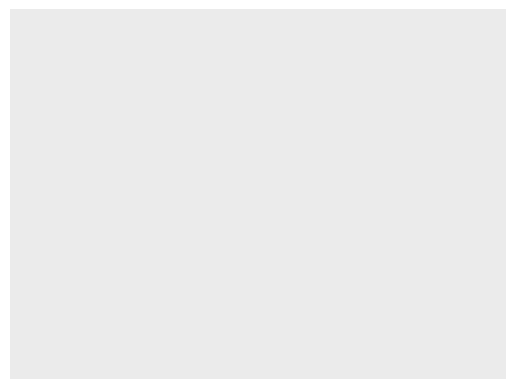

<ggplot: (8753754033393)>

In [3]:
# Initial empty plot
(p9.ggplot(data=surveys_complete))

* Define aesthetics (`aes`), by **selecting variables** used in the plot and `mapping` them to a presentation. The most important aes mappings are: `x`, `y`, `alpha`, `color`, `colour`, `fill`, `linetype`, `shape`, `size` and `stroke`.

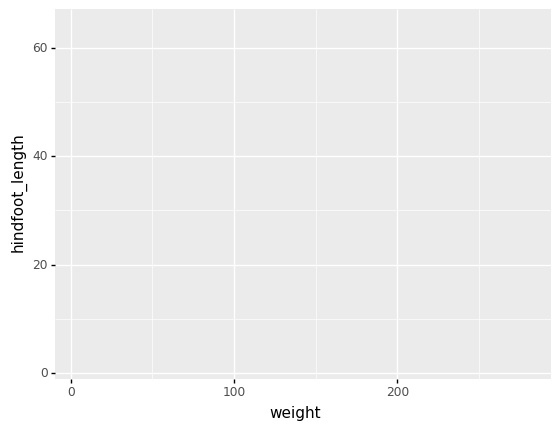

<ggplot: (8753773706081)>

In [5]:
# Adding x and y axis
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length')))

In [7]:
len(surveys_complete)

30676

* To add a `geom_*` object to the plot use `+` operator

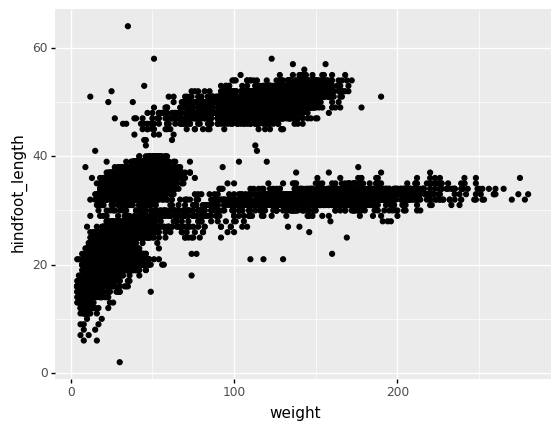

<ggplot: (8753753732021)>

In [6]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)

* You can easily set up plot templates and conveniently explore different types of plots

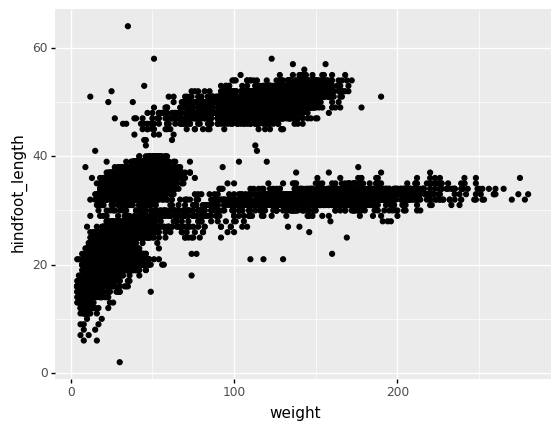

<ggplot: (8753753653773)>

In [8]:
# Create a template
surveys_plot = p9.ggplot(data=surveys_complete,
                         mapping=p9.aes(x='weight', y='hindfoot_length'))

# Draw the plot
surveys_plot + p9.geom_point()

* After creating your plot, you can save it to a file in your favourite format

In [10]:
scatterWL = surveys_plot + p9.geom_point()

scatterWL.save("scatterplot.png", width=10, height=10, dpi=300)

/opt/ipython-kernel/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 10 x 10 in image.
/opt/ipython-kernel/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: scatterplot.png


### Exercises - bar chart
Working on the `surveys_complete` data set, use the `plot_id` column to create a `bar` plot that counts the number of records for each plot. Hint: the count will be done implicitly by the `geom_bar()` function.

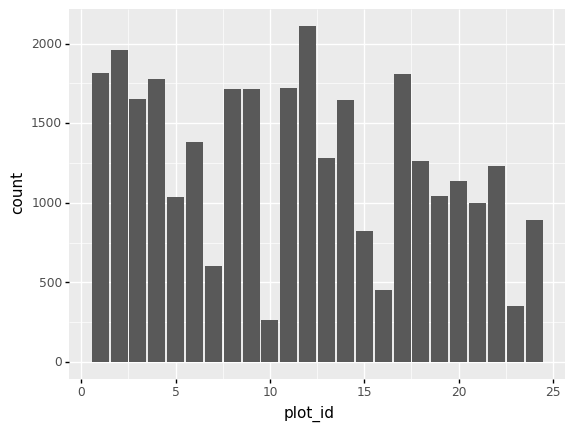

<ggplot: (8753752971829)>

In [11]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id'))
    + p9.geom_bar()
)

## Building your plots iteratively
* Usually, `data`, `aes` and `geom-*` are the elementary elements of any graph:

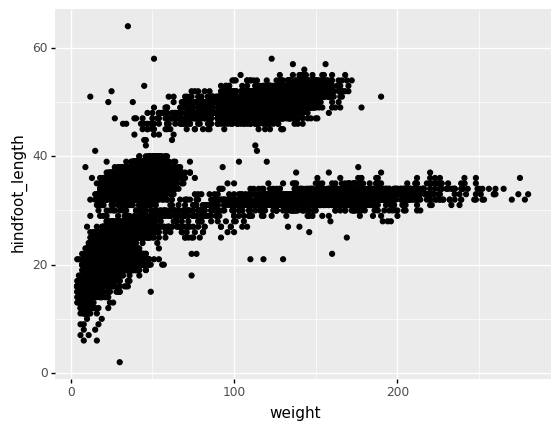

<ggplot: (8753752640397)>

In [12]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point()
)

* Then, we start modifying this plot to extract more information from it. With transparency (alpha):

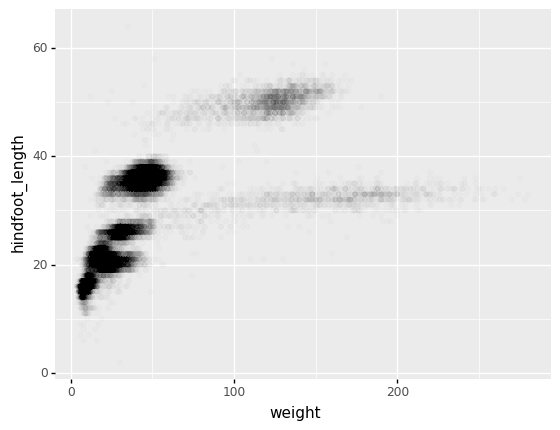

<ggplot: (8753748795637)>

In [15]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length'))
    + p9.geom_point(alpha=0.01)
)

* We can also get a different color for each species (by mapping the `species_id` column to the `color` aesthetic):

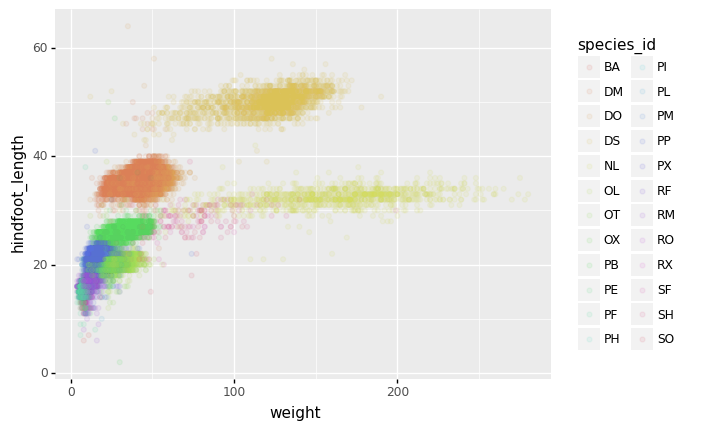

<ggplot: (8753753604149)>

In [16]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
)

* Changing labels:

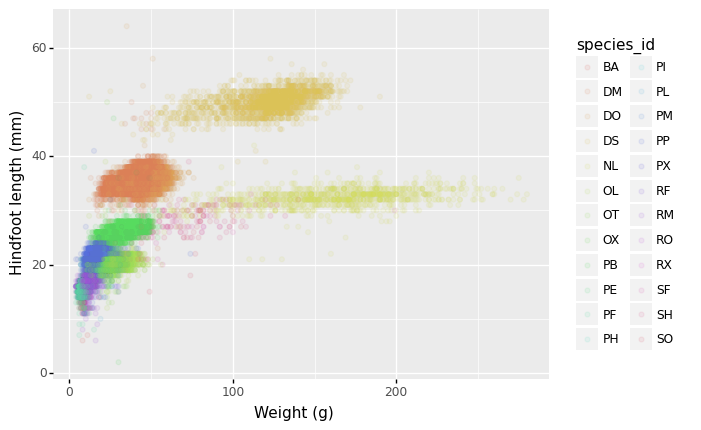

<ggplot: (8753752257621)>

In [17]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)") + p9.ylab("Hindfoot length (mm)")
)

* Defining scale for colors, axes,... For example, a log-version of the x-axis:

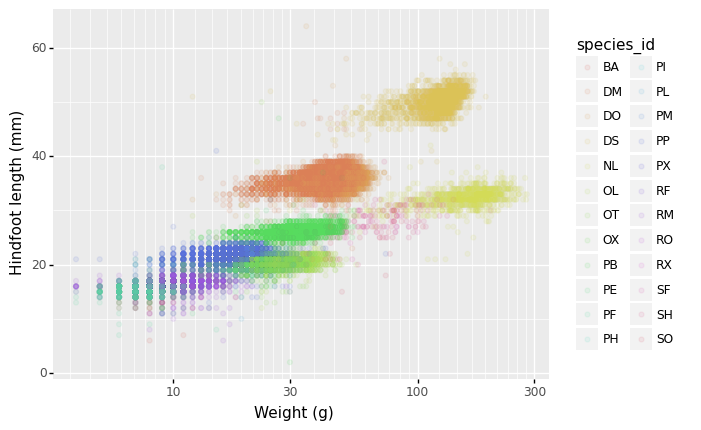

<ggplot: (8753748027553)>

In [18]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)") + p9.ylab("Hindfoot length (mm)")
    + p9.scale_x_log10()
)

* Changing the theme (`theme_*`) or some specific theming (`theme`) elements. We can set the background to white using the function `theme_bw()`:

findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


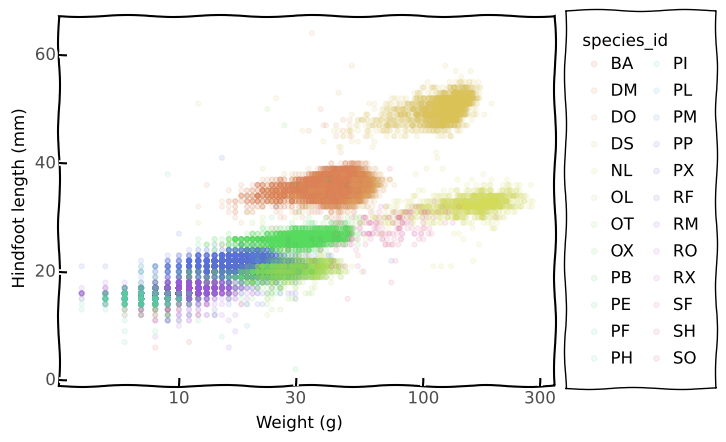

<ggplot: (8753741857465)>

In [21]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight', y='hindfoot_length', color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.xlab("Weight (g)") + p9.ylab("Hindfoot length (mm)")
    + p9.scale_x_log10()
    + p9.theme_xkcd()
    + p9.theme(text=p9.element_text(size=12))
)

### Exercise - Bar plot adaptations
Adapt the bar plot of the previous exercise by mapping the `sex` variable to the aesthetic `fill`. Then, use the `scale_fill_manual()` function in order to specify both colors `blue` and `orange` (see [API reference](https://plotnine.readthedocs.io/en/stable/api.html#color-and-fill-scales) for other `scale*` functions and how to use them).

In [27]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='plot_id',
                          y='sex'))
    + p9.geom_bar()
    + p9.x_lab(["blue", "orange"])
)

AttributeError: module 'plotnine' has no attribute 'x_lab'

## Plotting distributions
* A boxplot can be used:

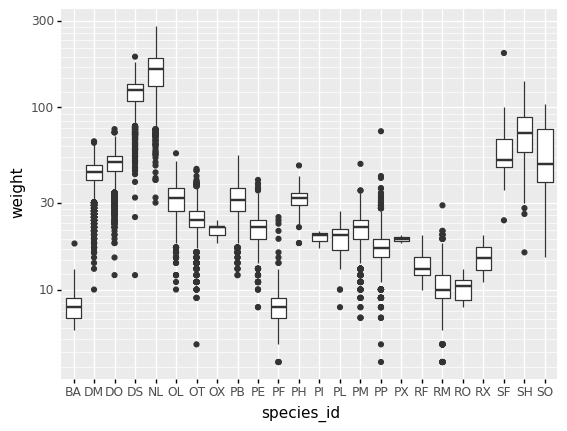

<ggplot: (8753741878825)>

In [24]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_boxplot()
    + p9.scale_y_log10()
)

* Adding points behind the boxplot:

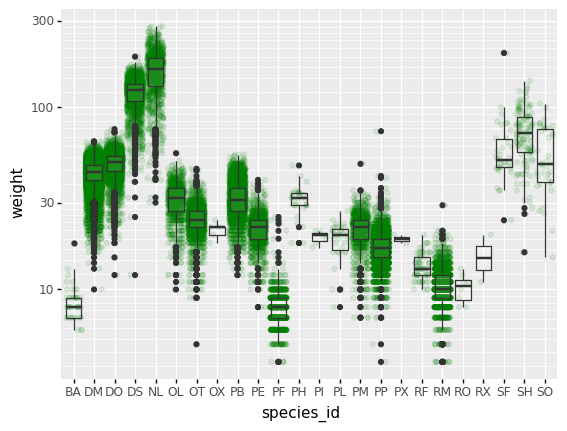

<ggplot: (8753741861669)>

In [25]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='species_id',
                          y='weight'))
    + p9.geom_jitter(alpha=0.1, color='green')
    + p9.geom_boxplot(alpha=0.1)
    + p9.scale_y_log10()
)

### Exercise - Distributions
An alternative to the boxplot is the violin plot (sometimes known as a beanplot), where the shape of the density of points is drawn.

* For the `x` axis, we want all `plot_id` values to be handled as category values. This can be specified in the `aes` object with `'factor(plot_id)'`.
* Data points must have a color according to the `species_id` from which the sample was taken.
* Generate a transparent **violin-plot** with a `grey` line on top of points. See [`geom_violin()`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_violin.html).

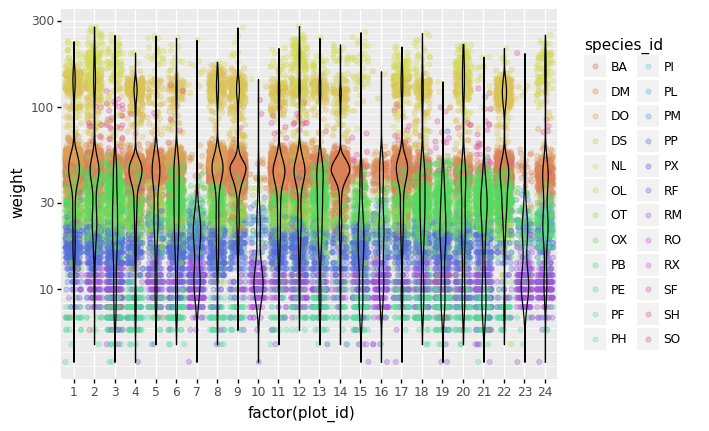

<ggplot: (8753753390509)>

In [30]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(plot_id)',
                          y='weight',
                          color='species_id'))
    + p9.geom_jitter(alpha=0.3)
    + p9.geom_violin(alpha=0, color="black")
    + p9.scale_y_log10()
)

## Plotting time series data
* Let’s calculate number of records per year for each species.
* Reset the index - `year` and `species_id` will become columns.

In [32]:
yearly_counts = surveys_complete.groupby(['year', 'species_id'])['species_id'].count()
yearly_counts = yearly_counts.reset_index(name='counts')
yearly_counts

,year,species_id,counts
0,1977,DM,181
1,1977,DO,12
2,1977,DS,29
3,1977,OL,1
4,1977,OX,2
...,...,...,...
327,2002,PP,375
328,2002,RM,20
329,2002,RO,7
330,2002,SF,5


* Timelapse data can be visualised as a line plot (i.e. `geom_line`) with years on `x` axis and counts on the `y` axis.
* We need to tell `plotnine` to draw a line for each species by modifying the aesthetic function and map the `species_id` to the color:

/opt/ipython-kernel/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


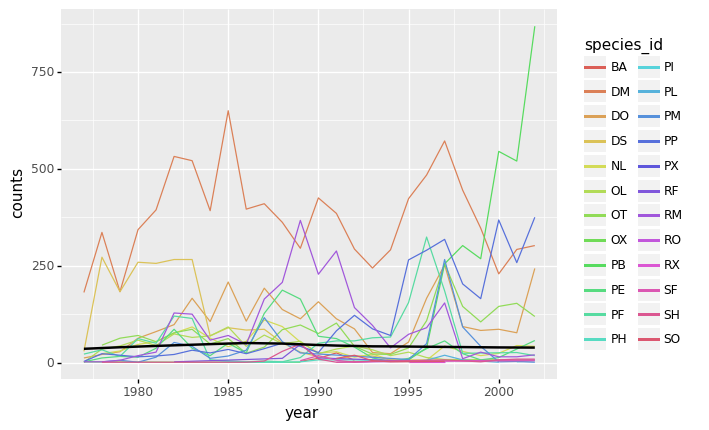

<ggplot: (8753747379453)>

In [47]:
(p9.ggplot(data=yearly_counts,
           mapping=p9.aes(x='year',
                          y='counts',
                          color='species_id')) #group=
    + p9.geom_line() #smooth
   # + p9.geom_line(color='black')
    + p9.geom_smooth(color='black')
    #+ p9.scale_y_log10()
)

## Faceting
* `plotnine` has a special technique called *faceting* that allows to split one plot into multiple plots based on a factor variable included in the dataset.

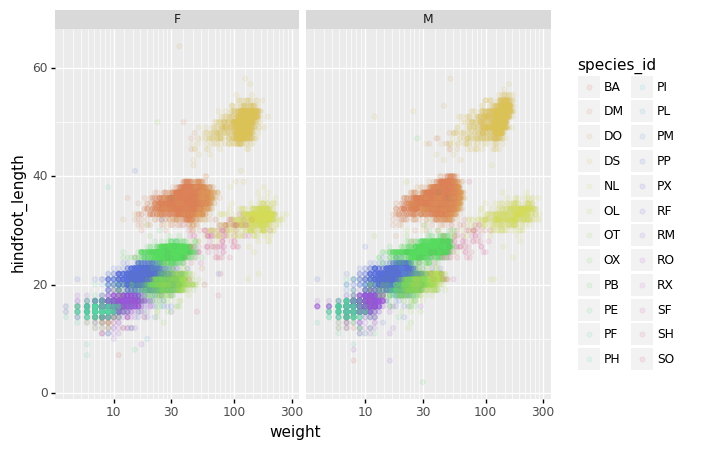

<ggplot: (8753752213413)>

In [38]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap('sex')
    + p9.scale_x_log10()
)

* We can apply the same concept on any of the available categorical variables:

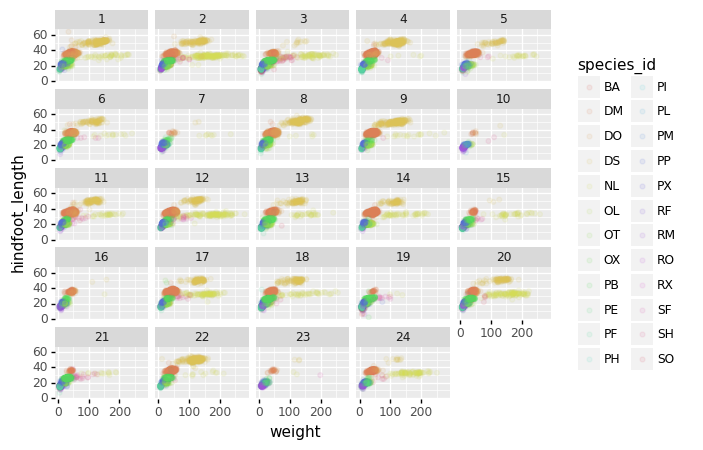

<ggplot: (8753748498213)>

In [39]:
(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_wrap('plot_id')
)

* The `facet_grid` geometry allows you to explicitly specify how you want your plots to be arranged via formula notation `rows ~ columns`

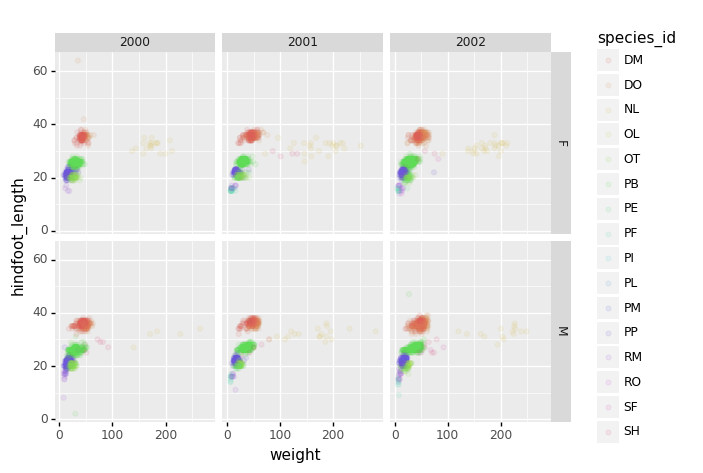

<ggplot: (8753753366161)>

In [40]:
# Only select years of interest
survey_2000 = surveys_complete[surveys_complete["year"].isin([2000, 2001, 2002])]

(p9.ggplot(data=survey_2000,
           mapping=p9.aes(x='weight',
                          y='hindfoot_length',
                          color='species_id'))
    + p9.geom_point(alpha=0.1)
    + p9.facet_grid('sex ~ year')
)

### Exercise - Faceting
Visually compare how the average `weight` of females and males has changed through time by creating a separate plot for each `sex` and an individual color assigned to each `species_id`.

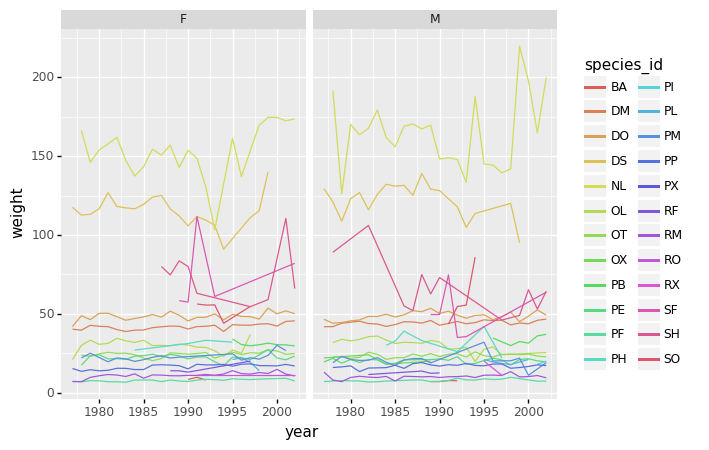

<ggplot: (8753749567825)>

In [41]:
yearly_weight = surveys_complete.groupby(['year',
                                          'species_id',
                                          'sex'])['weight'].mean().reset_index()
(p9.ggplot(data=yearly_weight,
           mapping=p9.aes(x='year',
                          y='weight',
                          color='species_id'))
    + p9.geom_line()
    + p9.facet_wrap('sex')
)

## Further customization
* The `theme` functionality provides a way to rotate the text of the x-axis labels:

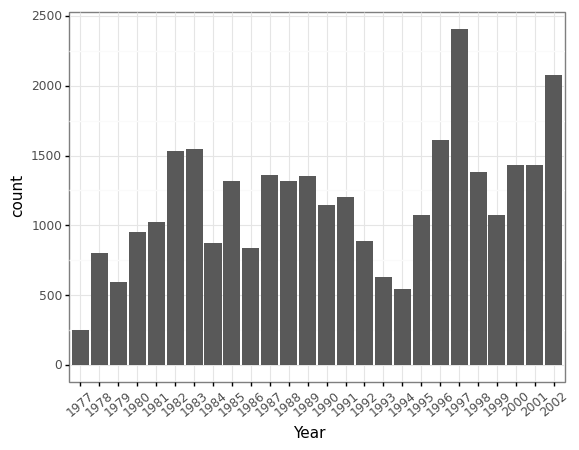

<ggplot: (8753752170297)>

In [45]:
my_custom_theme = p9.theme(axis_text_x = p9.element_text(angle=40))

(p9.ggplot(data=surveys_complete,
           mapping=p9.aes(x='factor(year)'))
    + p9.geom_bar()
    + p9.xlab("Year")
    + p9.theme_bw()
    + my_custom_theme
)